In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import re
sns.set()

In [2]:
folder = '../formula-1-race-data-19502017/'
laptimes = pd.read_csv(folder + 'lapTimes.csv', encoding='latin-1')
races = pd.read_csv(folder + 'races.csv', encoding='latin-1')
drivers = pd.read_csv(folder + 'drivers_copy.csv',encoding= 'utf-8')
results = pd.read_csv(folder + 'results.csv', encoding='latin-1')
circuits = pd.read_csv(folder + 'circuits.csv', encoding='latin-1')
status = pd.read_csv(folder + 'status.csv', encoding='latin-1')


In [3]:
#Merge all csv 
dff = results.copy()
dff = dff.merge(laptimes, how='left')
dff = dff.merge(races, how='left')
dff = dff.merge(drivers, how='left')
dff = dff.merge(circuits, how='left')
dff = dff.merge(status, how='left')
dff.shape
print(dff['year'].min())
print(dff['year'].max())

1950.0
2004.0


In [26]:
(drivers[drivers['nationality'] == 'Argentine-Italian'])

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
182,573,tomaso,NaN,NaN,Alessandro,de Tomaso,10/07/1928,Argentine-Italian,http://en.wikipedia.org/wiki/Alessandro_de_Tomaso


In [27]:
folder_path = '../formula-1-race-data-19502017/'
top_100 = pd.read_excel(folder_path + 'top_100.xlsx', encoding= 'latin-1',index_col=False)
scores = pd.read_excel(folder_path + 'score_season_2014_2015_2016.xlsx', encoding = 'latin-1', header = 0)
print(top_100.columns)
print(scores.columns)
print(top_100.head())
print(scores.head())

Index(['raceId', 'name', 'points', 'year'], dtype='object')
Index(['raceId', 'name', 'points', 'year'], dtype='object')
   raceId                  name  points  year
0     879  Brazilian Grand Prix    9.45  2012
1     843    Chinese Grand Prix    9.24  2011
2     906   Canadian Grand Prix    9.19  2014
3     910  Hungarian Grand Prix    9.14  2014
4     936  Hungarian Grand Prix    9.11  2015
   raceId                  name  points  year
0     952    Spanish Grand Prix    8.71  2016
1     956   Austrian Grand Prix    8.10  2016
2     964  Malaysian Grand Prix    8.01  2016
3     967  Brazilian Grand Prix    7.94  2016
4     950    Chinese Grand Prix    7.85  2016


In [28]:
top_100

,raceId,name,points,year
0,879,Brazilian Grand Prix,9.45,2012
1,843,Chinese Grand Prix,9.24,2011
2,906,Canadian Grand Prix,9.19,2014
3,910,Hungarian Grand Prix,9.14,2014
4,936,Hungarian Grand Prix,9.11,2015
...,...,...,...,...
95,868,British Grand Prix,7.05,2012
96,905,Monaco Grand Prix,7.04,2014
97,964,Japanese Grand Prix,6.98,2016
98,941,Russian Grand Prix,6.97,2015


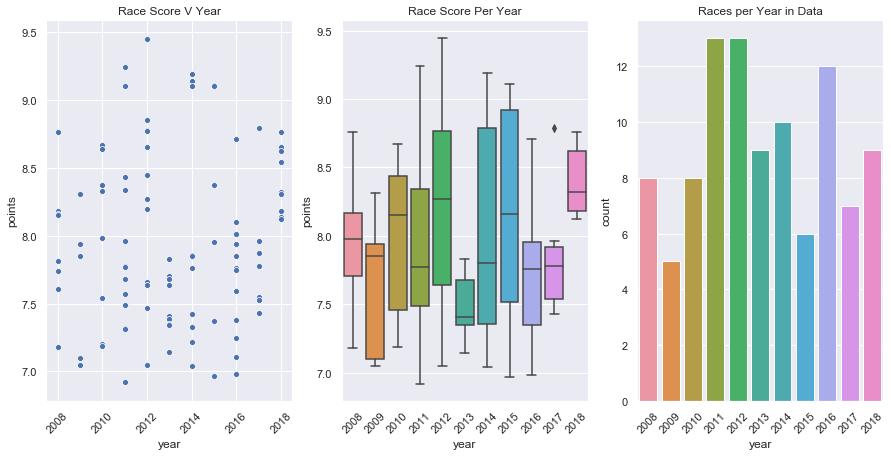

In [29]:
fig = plt.figure(figsize= (15,7))
plt.subplot(1,3,1)
plt.title( 'Race Score V Year')
_ = sns.scatterplot(x = top_100['year'].sort_values(ascending=True), y = 'points', data= top_100)
plt.xticks(rotation = 45)
plt.subplot(1,3,2)
plt.title('Race Score Per Year')
_ = sns.boxplot(x= top_100['year'].sort_values(ascending=False), y = 'points', data = top_100)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
plt.title('Races per Year in Data')
_ = sns.countplot(x = top_100['year'].sort_values(ascending=True), data = top_100)
plt.xticks(rotation=45)
plt.show();


In [30]:
top_100.dtypes

raceId      int64
name       object
points    float64
year        int64
dtype: object

In [31]:
print(results[results['raceId'] == 974][['resultId', 'raceId', 'driverId','grid','position','statusId']])

       resultId  raceId  driverId  grid  position  statusId
23474     23479     974        20     2       1.0         1
23475     23480     974         8     1       2.0         1
23476     23481     974       817     5       3.0         1
23477     23482     974       822     3       4.0         1
23478     23483     974       830     4       5.0         1
23479     23484     974       832     6       6.0         1
23480     23485     974         1    13       7.0         1
23481     23486     974       154     8       8.0         1
23482     23487     974        13    14       9.0         1
23483     23488     974       825    11      10.0         1
23484     23489     974       835    16      11.0         1
23485     23490     974       839    15      12.0         1
23486     23491     974       815     7      13.0         1
23487     23492     974       826     9      14.0       130
23488     23493     974       840    17      15.0        23
23489     23494     974       838    12 

In [32]:
print(status[status['statusId'].isin([1,2,3,131, 4, 130, 11, 12])])

     statusId            status
0           1          Finished
1           2      Disqualified
2           3          Accident
3           4         Collision
10         11            +1 Lap
11         12           +2 Laps
127       130  Collision damage
128       131        Power Unit


In [33]:
#races[(races['date'] < datetime.date(2018,12,31)) & races[(races['date']> datetime.date(2008,1,1))]]

In [34]:
df_scores = pd.concat([top_100, scores])
df_scores = df_scores.drop_duplicates(subset= 'raceId')
df_scores.head()

,raceId,name,points,year
0,879,Brazilian Grand Prix,9.45,2012
1,843,Chinese Grand Prix,9.24,2011
2,906,Canadian Grand Prix,9.19,2014
3,910,Hungarian Grand Prix,9.14,2014
4,936,Hungarian Grand Prix,9.11,2015


In [35]:
df_scores.sort_values('points',ascending=False).head(10).name.value_counts()

Hungarian Grand Prix        2
Canadian Grand Prix         2
Chinese Grand Prix          1
Azerbaijan Grand Prix       1
Abu Dhabi Grand Prix        1
United States Grand Prix    1
Brazilian Grand Prix        1
Bahrain Grand Prix          1
Name: name, dtype: int64

In [36]:
df_scores.sort_values('points',ascending=False).tail(10).name.value_counts()

Japanese Grand Prix      2
Russian Grand Prix       2
Hungarian Grand Prix     1
Italian Grand Prix       1
Australian Grand Prix    1
Azerbaijan Grand Prix    1
Spanish Grand Prix       1
Brazilian Grand Prix     1
Name: name, dtype: int64

In [37]:
# How many races in the dataset. The European grand prix only has one data point so thats why it has the highest rank. That should be eliminated from the table. 
df_scores.groupby(['name']).points.count()

name
Abu Dhabi Grand Prix        4
Australian Grand Prix       8
Austrian Grand Prix         4
Azerbaijan Grand Prix       3
Bahrain Grand Prix          6
Belgian Grand Prix          8
Brazilian Grand Prix        8
British Grand Prix          9
Canadian Grand Prix         7
Chinese Grand Prix          9
European Grand Prix         1
German Grand Prix           8
Hungarian Grand Prix        5
Italian Grand Prix          8
Japanese Grand Prix         4
Korean Grand Prix           3
Malaysian Grand Prix        6
Mexican Grand Prix          2
Monaco Grand Prix           5
Russian Grand Prix          3
Singapore Grand Prix        4
Spanish Grand Prix          6
Turkish Grand Prix          2
United States Grand Prix    6
Name: points, dtype: int64

In [38]:
df_scores.groupby(['name']).points.mean().sort_values(ascending=False)

name
European Grand Prix         8.780000
Canadian Grand Prix         8.008571
Bahrain Grand Prix          7.993333
United States Grand Prix    7.963333
Hungarian Grand Prix        7.864000
Brazilian Grand Prix        7.696250
Malaysian Grand Prix        7.656667
Chinese Grand Prix          7.646667
Turkish Grand Prix          7.645000
British Grand Prix          7.632222
Abu Dhabi Grand Prix        7.630000
Belgian Grand Prix          7.575000
German Grand Prix           7.401250
Australian Grand Prix       7.368750
Azerbaijan Grand Prix       7.353333
Spanish Grand Prix          7.295000
Korean Grand Prix           7.270000
Monaco Grand Prix           7.256000
Austrian Grand Prix         7.130000
Italian Grand Prix          7.080000
Singapore Grand Prix        6.820000
Japanese Grand Prix         6.775000
Mexican Grand Prix          5.690000
Russian Grand Prix          5.476667
Name: points, dtype: float64

### Hypothesis 1: Amount of DNF's affects the score

Does the amount of drivers not finishing the race correalte to the race points. "More DNFs = more action". Others thinking less competitors means less racing. Lets study the Brazilian grand prix 2012 (raceid 879), the most exciting races, and see how DNFs faired. 

In [39]:
print(results[results.raceId == 879 ][['resultId','raceId','driverId','grid','position','statusId']])

print("")

print('StatusId:')
print(status[status['statusId'].isin([4,3,11,12,1])])

print ('')
print('driverRef')
print([drivers[[each for each in drivers.columns[0:8]]][drivers['driverId'].isin(['1','154','813','811','815'])]])


       resultId  raceId  driverId  grid  position  statusId
21685     21688     879        18     2       1.0         1
21686     21689     879         4     7       2.0         1
21687     21690     879        13     5       3.0         1
21688     21691     879        17     3       4.0         1
21689     21692     879       807     6       5.0         1
21690     21693     879        20     4       6.0         1
21691     21694     879        30    13       7.0         1
21692     21695     879       818    17       8.0         1
21693     21696     879       155    14       9.0         1
21694     21697     879         8     8      10.0        11
21695     21698     879       808    19      11.0        11
21696     21699     879       819    22      12.0        11
21697     21700     879       817    15      13.0        11
21698     21701     879         5    20      14.0        11
21699     21702     879         3     9      15.0        11
21700     21703     879        10    21 

In [40]:
df = pd.merge(left=df_scores, right=races, on= 'raceId', how='left')
df = df.dropna(axis=0)
dropIndex = df[df['raceId'] > 988].index
df.drop(dropIndex, inplace = True)
print(df.columns)
print(len(df))

Index(['raceId', 'name_x', 'points', 'year_x', 'year_y', 'round', 'circuitId',
       'name_y', 'date', 'time', 'url'],
      dtype='object')
120


In [41]:
#Shows the status for those that finished, everything else is considered a DNF 
print(status[status['statusId'].isin(['1','11','12','13','14','15','16','17','18','19'])])

    statusId    status
0          1  Finished
10        11    +1 Lap
11        12   +2 Laps
12        13   +3 Laps
13        14   +4 Laps
14        15   +5 Laps
15        16   +6 Laps
16        17   +7 Laps
17        18   +8 Laps
18        19   +9 Laps


In [42]:
def count_dnf(_results,_raceid):
    # Count the number of "did no finish" per race
    #for each result, there is a statusId and a collection of these signify that the driver finished
    
    dnf_count = 0
    finished_status = [1,11,12,13,14,15,16,17,18,19]
    
    for i in _results[_results['raceId'] == _raceid]['statusId']:
        if i not in finished_status:
            dnf_count += 1
        
        else:
            pass
        
    return dnf_count

In [43]:
count_dnf(results,1)

8

In [44]:
#Double checkin this function. 
results[results.raceId == 1][['statusId','raceId']].tail()

,statusId,raceId
7568,22,1
7569,20,1
7570,3,1
7571,4,1
7572,2,1


In [45]:
df['dnf'] = df.raceId.apply(lambda x: count_dnf(results,x))

In [46]:
df[df.dnf == 16]

,raceId,name_x,points,year_x,year_y,round,circuitId,name_y,date,time,url,dnf
66,18,Australian Grand Prix,7.61,2008,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,16


In [47]:
df.dtypes

raceId         int64
name_x        object
points       float64
year_x         int64
year_y         int64
round          int64
circuitId      int64
name_y        object
date          object
time          object
url           object
dnf            int64
dtype: object

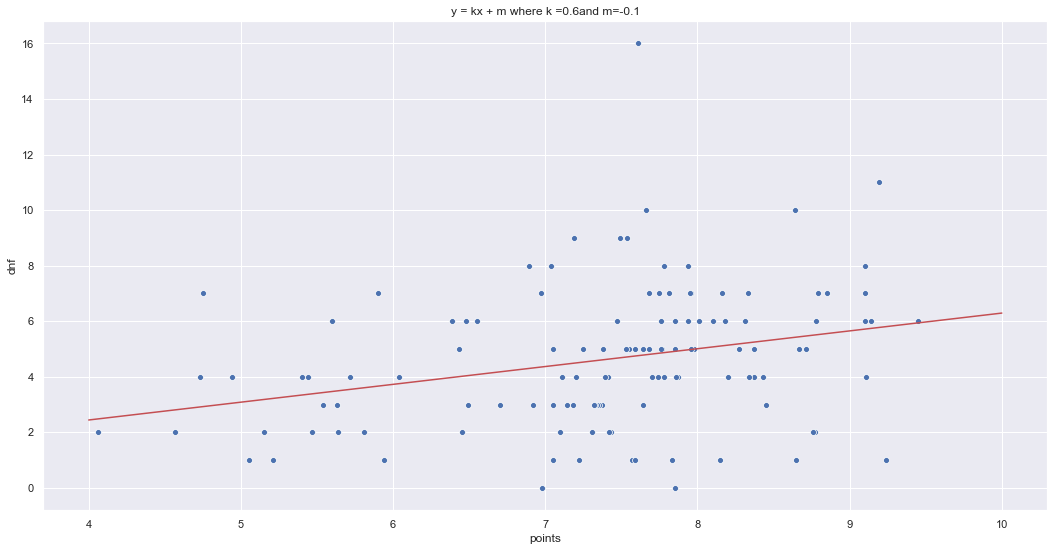

In [48]:
fig = plt.figure(figsize=(18,9))
_ = sns.scatterplot(x='points', y='dnf', data=df)
pf = np.polyfit(x=df.points, y = df.dnf, deg=1)
_ = plt.plot(np.linspace(4, 10, len(df)), pf[0] * np.linspace(4, 10 , len(df)) + pf[1],'r')
plt.title('y = kx + m where k =' + str(round(pf[0],1)) + "and m=" + str(round(pf[1],1)))
plt.show()

In [49]:
# the linspace is chosen by the range of the points. brazil was the highest rank, but remeber \
    #this isnt just the top_100 csv anymore. 
np.linspace(4, 10, len(df))

array([ 4.        ,  4.05042017,  4.10084034,  4.1512605 ,  4.20168067,
        4.25210084,  4.30252101,  4.35294118,  4.40336134,  4.45378151,
        4.50420168,  4.55462185,  4.60504202,  4.65546218,  4.70588235,
        4.75630252,  4.80672269,  4.85714286,  4.90756303,  4.95798319,
        5.00840336,  5.05882353,  5.1092437 ,  5.15966387,  5.21008403,
        5.2605042 ,  5.31092437,  5.36134454,  5.41176471,  5.46218487,
        5.51260504,  5.56302521,  5.61344538,  5.66386555,  5.71428571,
        5.76470588,  5.81512605,  5.86554622,  5.91596639,  5.96638655,
        6.01680672,  6.06722689,  6.11764706,  6.16806723,  6.21848739,
        6.26890756,  6.31932773,  6.3697479 ,  6.42016807,  6.47058824,
        6.5210084 ,  6.57142857,  6.62184874,  6.67226891,  6.72268908,
        6.77310924,  6.82352941,  6.87394958,  6.92436975,  6.97478992,
        7.02521008,  7.07563025,  7.12605042,  7.17647059,  7.22689076,
        7.27731092,  7.32773109,  7.37815126,  7.42857143,  7.47

In [50]:
dnf_pts_p = df[['points', 'dnf']].corr()
print(dnf_pts_p)

          points       dnf
points  1.000000  0.287608
dnf     0.287608  1.000000


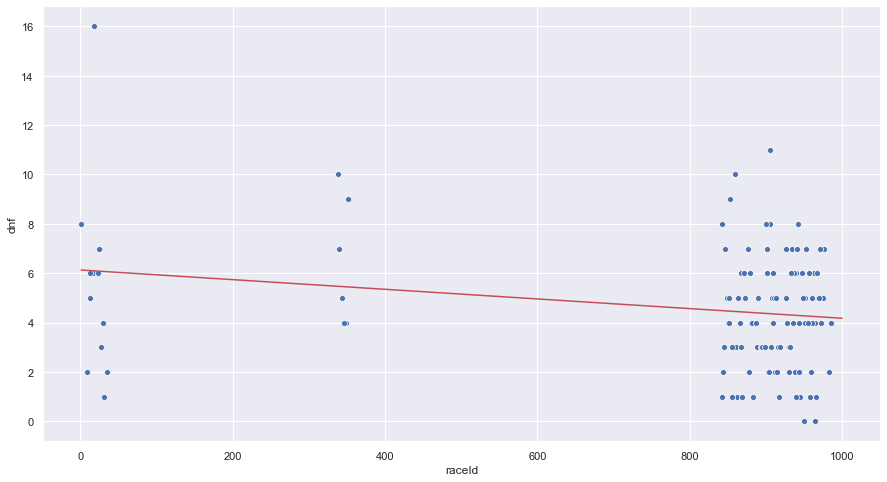

In [51]:
# the raceid are clustered, why??
fig = plt.figure(figsize=(15,8))
_ = sns.scatterplot(x='raceId', y='dnf', data=df)
pf = np.polyfit(x=df.raceId, y = df.dnf, deg = 1)
_ = plt.plot(np.linspace(1,1000, len(df)), pf[0] * np.linspace(1,1000,len(df)) + pf[1],'r' )
plt.show()

In [52]:
# convert time to minutes after midnight to make it an int. 
def secSinceNoon(datTimStr):
    tt = pd.to_datetime(datTimStr).time()
    return tt.hour * 60 + tt.minute * 60 + tt.second 

In [55]:
#this gives me mintues after midnight
df['hh_2_min'] = df.time.apply(secSinceNoon)

In [56]:
df.dtypes

raceId         int64
name_x        object
points       float64
year_x         int64
year_y         int64
round          int64
circuitId      int64
name_y        object
date          object
time          object
url           object
dnf            int64
hh_2_min       int64
dtype: object

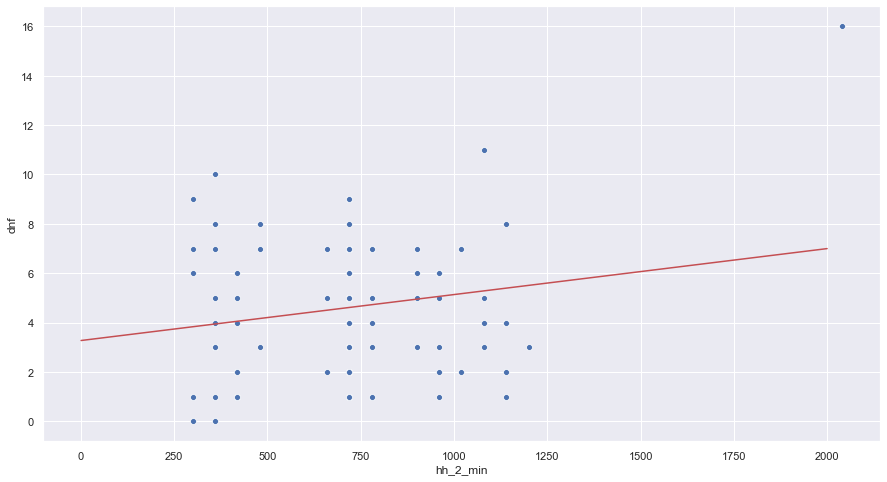

In [57]:
#time of the race doesnt really impact dnfs. I was hoping to see a higher correlation. 
fig = plt.figure(figsize=(15,8))
_ = sns.scatterplot(x='hh_2_min', y='dnf', data=df)
pf = np.polyfit(x=df.hh_2_min, y = df.dnf, deg=1)
_ = plt.plot(np.linspace(1,2000, len(df)), pf[0] * np.linspace(1,2000,len(df)) + pf[1],'r' )
plt.show()

In [58]:
df[['hh_2_min','dnf']].corr()

,hh_2_min,dnf
hh_2_min,1.00000,0.18656
dnf,0.18656,1.00000


### Does overtanking affect the score of race

if the race has drivers battling for positions, we assume that they're either taking over or being overtaken. 

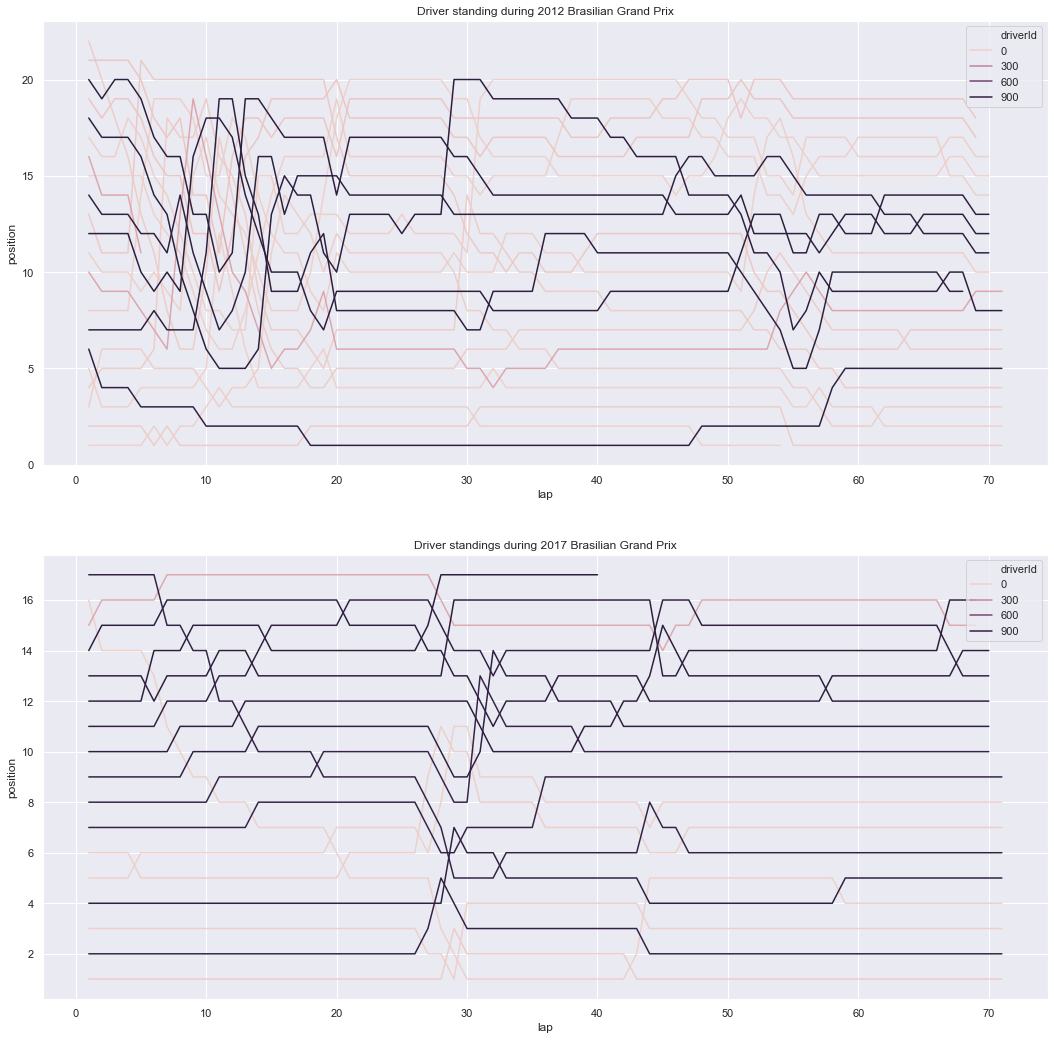

In [59]:
fig = plt.figure(figsize=(18,18))
plt.subplot(2,1,1)
_ = sns.lineplot(x='lap', y='position', hue = 'driverId', data= laptimes[laptimes['raceId'] == 879])
plt.title('Driver standing during 2012 Brasilian Grand Prix')
plt.subplot(2,1,2)
_ = sns.lineplot(x='lap', y='position', hue = 'driverId', data= laptimes[laptimes['raceId'] == 987])
plt.title('Driver standings during 2017 Brasilian Grand Prix')
plt.show()

In [60]:
laptimes[laptimes.raceId == 987]

,raceId,driverId,lap,position,time,milliseconds
424435,987,817,1,17,2:16.146,136146
424436,987,817,2,17,2:16.740,136740
424437,987,817,3,17,2:12.136,132136
424438,987,817,4,17,1:58.599,118599
424439,987,817,5,17,1:44.016,104016
...,...,...,...,...,...,...
425597,987,154,65,16,1:14.168,74168
425598,987,154,66,16,1:13.532,73532
425599,987,154,67,15,1:13.994,73994
425600,987,154,68,15,1:13.963,73963


In [61]:
laptimes.shape

(426633, 6)

In [62]:
print(drivers.shape)
print(laptimes.shape)
print(drivers.columns)
print(laptimes.columns)

driver_sub = drivers.head(10)
laptimes_sub = laptimes.head(10)

(842, 9)
(426633, 6)
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')


In [63]:
df_racer = pd.merge(left=laptimes, right=drivers, how='left', left_on='driverId', right_on='driverId').drop(['url'],axis=1)
df_racer.head()

,raceId,driverId,lap,position,time,milliseconds,driverRef,number,code,forename,surname,dob,nationality
0,841,20,1,1,1:38.109,98109,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German
1,841,20,2,1,1:33.006,93006,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German
2,841,20,3,1,1:32.713,92713,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German
3,841,20,4,1,1:32.803,92803,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German
4,841,20,5,1,1:32.342,92342,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German


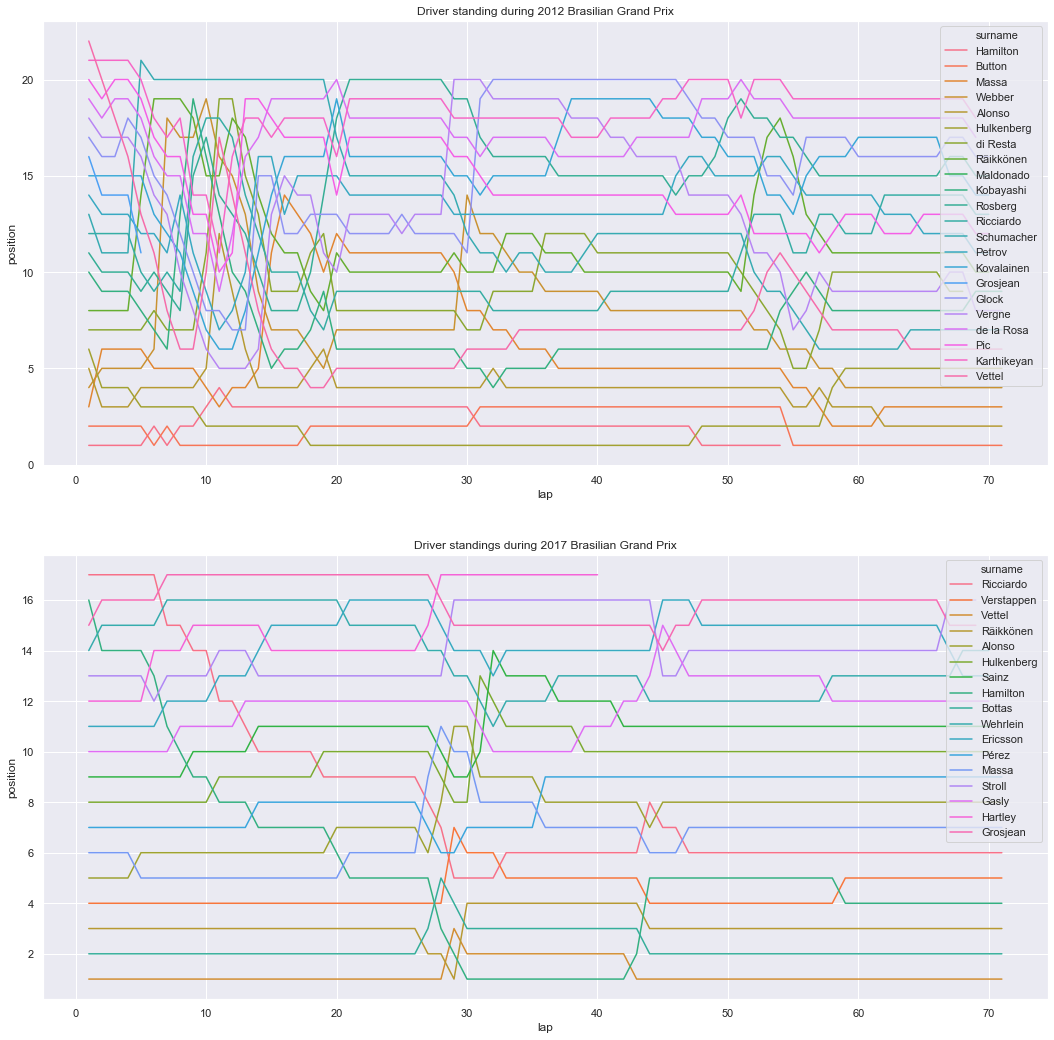

In [64]:
fig = plt.figure(figsize=(18,18))
plt.subplot(2,1,1)
_ = sns.lineplot(x='lap', y='position', hue = 'surname', data= df_racer[df_racer['raceId'] == 879],legend= 'brief')
plt.title('Driver standing during 2012 Brasilian Grand Prix')
plt.subplot(2,1,2)
_ = sns.lineplot(x='lap', y='position', hue = 'surname', data= df_racer[df_racer['raceId'] == 987])
plt.title('Driver standings during 2017 Brasilian Grand Prix')
plt.show()

In [65]:
# Had to replace the bad grammar on some of these names like RÌ_ikkÌ¦nen to Raikkonen'
print(df_racer.surname.unique()[:-1])

#df_racer[df_racer.surname == 'RÌ_ikkÌ¦nen']

#df_racer['surname'].replace('RÌ_ikkÌ¦nen','Raikkonen', inplace=True)

['Vettel' 'Hamilton' 'Webber' 'Petrov' 'Massa' 'Button' 'Rosberg'
 'Kobayashi' 'Alonso' 'di Resta' 'Buemi' 'Sutil' 'Heidfeld' 'Pérez'
 'Kovalainen' 'Maldonado' 'Trulli' "d'Ambrosio" 'Glock' 'Barrichello'
 'Alguersuari' 'Schumacher' 'Liuzzi' 'Karthikeyan' 'de la Rosa'
 'Ricciardo' 'Chandhok' 'Senna' 'Grosjean' 'Räikkönen' 'Vergne' 'Pic'
 'Hulkenberg' 'Gutiérrez' 'van der Garde' 'Bianchi' 'Chilton' 'Bottas'
 'Magnussen' 'Kvyat' 'Ericsson' 'Lotterer' 'Sainz' 'Stevens' 'Nasr'
 'Verstappen' 'Merhi' 'Rossi' 'Palmer' 'Wehrlein' 'Haryanto' 'Vandoorne'
 'Irvine' 'Alesi' 'Berger' 'Hill' 'Villeneuve' 'Häkkinen' 'Coulthard'
 'Panis' 'Diniz' 'Brundle' 'Frentzen' 'Rosset' 'Katayama' 'Salo' 'Lamy'
 'Fisichella' 'Herbert' 'Badoer' 'Montermini' 'Marques' 'Lavaggi' 'Nakano'
 'Larini' 'Morbidelli' 'Wurz' 'Fontana' 'Takagi' 'Tuero' 'Zanardi' ' Gené'
 'Zonta' 'Mazzacane' 'Burti' 'Pablo Montoya' 'Bernoldi' 'Yoong' 'Enge'
 'Sato' 'McNish' 'Davidson' 'Firman' 'Pizzonia' 'Wilson' 'da Matta'
 'Kiesa' 'Baumgartn

In [66]:
nations = list(df_racer['nationality'].unique())
nations

['German',
 'British',
 'Australian',
 'Russian',
 'Brazilian',
 'Japanese',
 'Spanish',
 'Swiss',
 'Mexican',
 'Finnish',
 'Venezuelan',
 'Italian',
 'Belgian',
 'Indian',
 'French',
 'Dutch',
 'Danish',
 'Swedish',
 'American',
 'Indonesian',
 'Austrian',
 'Canadian',
 'Portuguese',
 'Argentine',
 'Colombian',
 'Malaysian',
 'Czech',
 'Irish',
 'Hungarian',
 'Polish',
 'New Zealander']

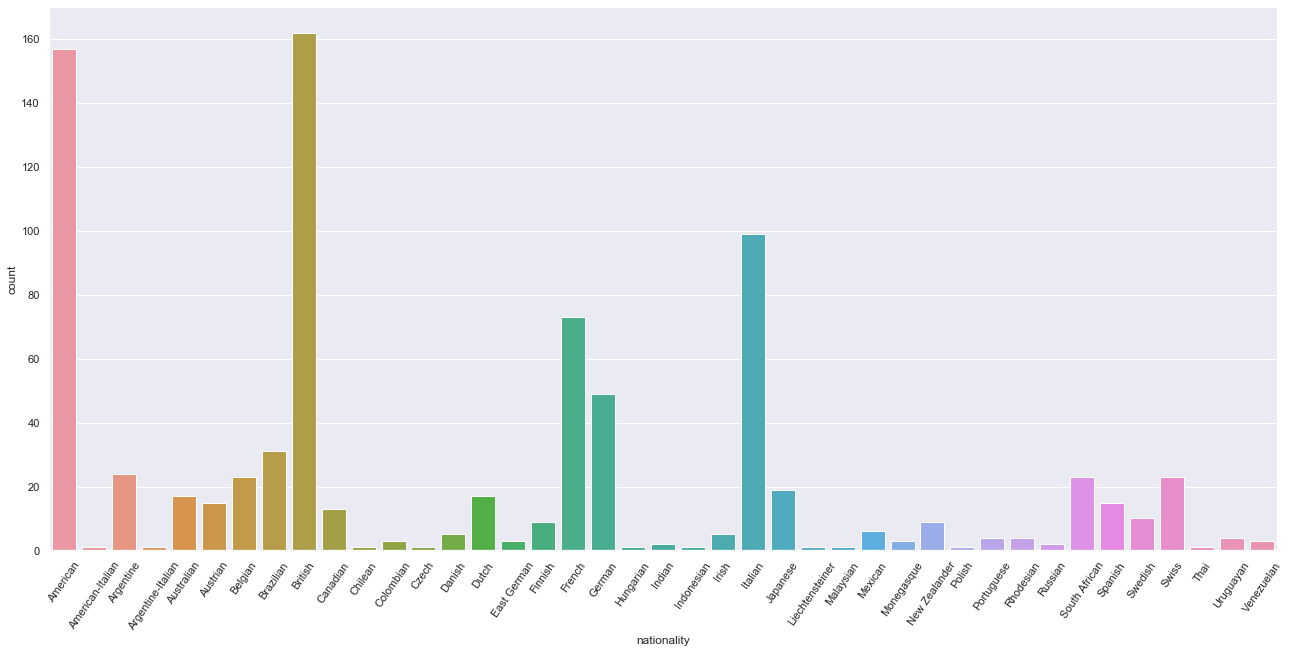

In [67]:
plt.figure(figsize=(22,10))
sns.countplot('nationality', data= drivers)
plt.xticks(rotation='55');

In [68]:
df_racer.nationality.value_counts().sort_values()

Czech              166
New Zealander      179
Indonesian         611
Irish              639
Malaysian          645
Hungarian          959
American          1587
Argentine         1802
Belgian           2050
Swiss             2579
Portuguese        2654
Indian            2777
Swedish           3810
Polish            4203
Danish            4335
Venezuelan        4507
Colombian         4917
Russian           6641
Austrian          7796
Canadian          9364
Mexican          10454
Dutch            10685
Japanese         14995
Australian       18151
French           26912
Spanish          28141
Italian          31664
Finnish          34943
Brazilian        46681
British          62265
German           79521
Name: nationality, dtype: int64

In [69]:
arg_df = df_racer[df_racer.nationality == 'Argentine']
arg_df.groupby('surname').count()

,raceId,driverId,lap,position,time,milliseconds,driverRef,number,code,forename,dob,nationality
surname,,,,,,,,,,,,
Fontana,142,142,142,142,142,142,142,0,0,142,142,142
Mazzacane,1047,1047,1047,1047,1047,1047,1047,0,0,1047,1047,1047
Tuero,613,613,613,613,613,613,613,0,0,613,613,613


In [70]:
pd.value_counts(df_racer['nationality'], normalize=True).head()


German       0.186392
British      0.145945
Brazilian    0.109417
Finnish      0.081904
Italian      0.074218
Name: nationality, dtype: float64

In [71]:
nationality_count = df_racer.groupby(['surname','forename','nationality']).count()

nationality_count = nationality_count.reset_index('nationality')

nationality_count.groupby('nationality').count().head()

,raceId,driverId,lap,position,time,milliseconds,driverRef,number,code,dob
nationality,,,,,,,,,,
American,2,2,2,2,2,2,2,2,2,2
Argentine,3,3,3,3,3,3,3,3,3,3
Australian,2,2,2,2,2,2,2,2,2,2
Austrian,4,4,4,4,4,4,4,4,4,4
Belgian,2,2,2,2,2,2,2,2,2,2


In [72]:
#get row counts per group, wihtout reseting the index this is just a series. Reset index to get a dataframe. 
(df_racer[['driverId','forename','surname','nationality']].groupby(['driverId','forename','surname','nationality']).size().reset_index(name='Count'))

,driverId,forename,surname,nationality,Count
0,1,Lewis,Hamilton,British,11701
1,2,Nick,Heidfeld,German,9701
2,3,Nico,Rosberg,German,11161
3,4,Fernando,Alonso,Spanish,15795
4,5,Heikki,Kovalainen,Finnish,5971
...,...,...,...,...,...
118,839,Esteban,Ocon,French,1625
119,840,Lance,Stroll,Canadian,1050
120,841,Antonio,Giovinazzi,Italian,58
121,842,Pierre,Gasly,French,301


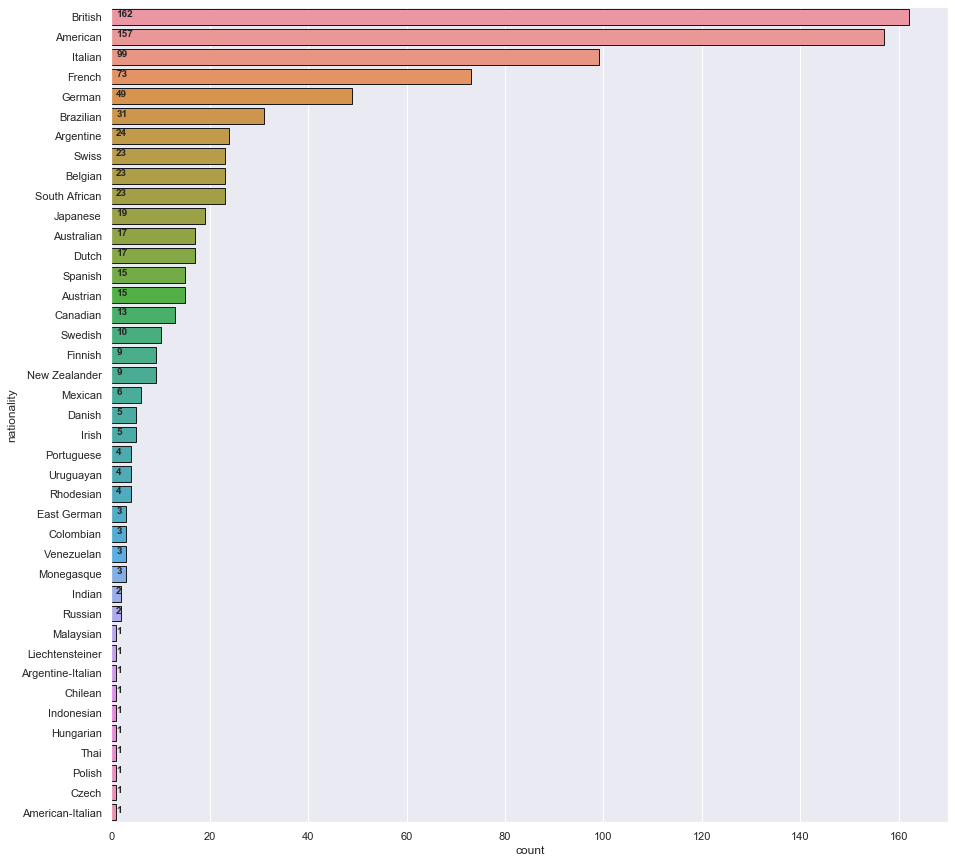

In [73]:
plt.figure(figsize=(15,15))
ax = sns.countplot( y= drivers['nationality'], 
             order = drivers['nationality'].value_counts().index,
             linewidth = 1, edgecolor = 'k')#*df_racer['nationality'].nunique())
for i,j in enumerate(drivers['nationality'].value_counts()):
    ax.text(1,i,j,weight='bold');

# Fastest lap per ciruit

In [74]:
laptimes['raceId'].nunique()

395

In [75]:
laptimes.groupby('raceId').count()

,driverId,lap,position,time,milliseconds
raceId,,,,,
1,1005,1005,1005,1005,1005
2,554,554,554,554,554
3,1023,1023,1023,1023,1023
4,1125,1125,1125,1125,1125
5,942,942,942,942,942
...,...,...,...,...,...
984,884,884,884,884,884
985,933,933,933,933,933
986,1225,1225,1225,1225,1225


In [76]:
ausie_df = laptimes[laptimes['raceId'] == 841] 
ausie_df

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
1078,841,30,15,20,1:38.276,98276
1079,841,30,16,20,1:36.991,96991
1080,841,30,17,21,1:57.213,117213
1081,841,30,18,21,1:42.267,102267


In [77]:
# looks like only 9 drivers completed the 58 lap race. 
ausie_df.groupby('driverId')['time'].count()

driverId
1      58
2      57
3      22
4      58
5      19
10     49
13     58
15     56
16     57
17     58
18     58
20     58
22     48
30     19
67     57
153    57
155    58
808    58
813     9
814    57
815    58
816    54
Name: time, dtype: int64

In [80]:

# ausie_df['time_secs'] = ausie_df['time'].str.split(':', expand=True)[0].astype(float)*60 + \
# ausie_df['time'].str.split(':', expand=True)[1].astype(float)

ausie_df['time_secs']= ausie_df['milliseconds']/1000
ausie_df['secs_mins']= ausie_df['milliseconds']/1000/60
ausie_df.sort_values('secs_mins', ascending=False)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,raceId,driverId,lap,position,time,milliseconds,time_secs,secs_mins
928,841,10,19,21,11:48.170,708170,708.170,11.802833
1064,841,30,1,22,2:41.428,161428,161.428,2.690467
981,841,22,23,15,2:24.606,144606,144.606,2.410100
1007,841,153,1,21,2:13.879,133879,133.879,2.231317
893,841,816,38,17,2:01.916,121916,121.916,2.031933
...,...,...,...,...,...,...,...,...
482,841,4,55,4,1:29.529,89529,89.529,1.492150
480,841,4,53,4,1:29.507,89507,89.507,1.491783
476,841,4,49,4,1:29.487,89487,89.487,1.491450
281,841,13,50,10,1:29.451,89451,89.451,1.490850


In [81]:
#what was the top, min, mean of laptimes( turend into seconds)
ausie_df['secs_mins'].describe(percentiles=[.1,.3,.65,.8])

count    1083.000000
mean        1.593646
std         0.326363
min         1.482450
10%         1.511183
30%         1.534063
50%         1.557017
65%         1.580828
80%         1.613023
max        11.802833
Name: secs_mins, dtype: float64

In [82]:
ausie_df[ausie_df['secs_mins']==1.482450]


,raceId,driverId,lap,position,time,milliseconds,time_secs,secs_mins
286,841,13,55,9,1:28.947,88947,88.947,1.48245


In [83]:
(ausie_df[ausie_df['secs_mins'] >= 11.802833])

,raceId,driverId,lap,position,time,milliseconds,time_secs,secs_mins
928,841,10,19,21,11:48.170,708170,708.17,11.802833


In [84]:
# #what was the top, min, mean of laptimes

#ausie_df['time'] = pd.to_datetime(ausie_df['time'], format='%M:%S.%f').dt.time

In [97]:

ausie_df['time'] = pd.to_timedelta(ausie_df['time'].radd('00:00', ),unit='s')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


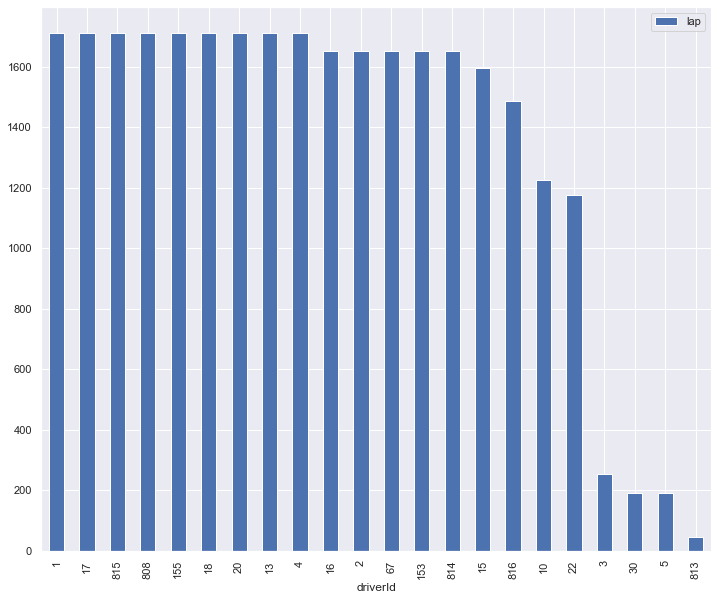

In [86]:

ausie_df.groupby('driverId').agg({'lap':'sum'}).sort_values('lap', ascending=False).plot.bar(figsize=(12,10));

In [87]:
ausie_df.groupby('driverId').agg({'lap':'sum'})

,lap
driverId,
1,1711
2,1653
3,253
4,1711
5,190
10,1225
13,1711
15,1596
16,1653


In [88]:
ausie_df[ausie_df['driverId'] == 1]['lap'].sum()/58

29.5

In [89]:
ausie_df.groupby('driverId')['secs_mins'].apply(lambda x: x.unique())[1]

array([1.67621667, 1.5629    , 1.54833333, 1.54303333, 1.54118333,
       1.54056667, 1.54078333, 1.5385    , 1.54353333, 1.55201667,
       1.54561667, 1.54658333, 1.54125   , 1.54973333, 1.5531    ,
       1.86731667, 1.65943333, 1.53038333, 1.52333333, 1.5199    ,
       1.5202    , 1.5254    , 1.52356667, 1.52606667, 1.53041667,
       1.52365   , 1.52516667, 1.53778333, 1.53043333, 1.51915   ,
       1.52421667, 1.57096667, 1.53555   , 1.5336    , 1.54045   ,
       1.8883    , 1.65913333, 1.51688333, 1.50563333, 1.52      ,
       1.50523333, 1.50701667, 1.51808333, 1.51958333, 1.50853333,
       1.50846667, 1.51061667, 1.51308333, 1.51255   , 1.51683333,
       1.52186667, 1.52715   , 1.5245    , 1.52981667, 1.52943333,
       1.53021667, 1.5364    , 1.57626667])

In [90]:
# get lap times for each driver in the aussie grand prix
def get_lap_times(driver_id):
    return ausie_df.groupby('driverId')['time'].apply(lambda x: x.unique())[driver_id]

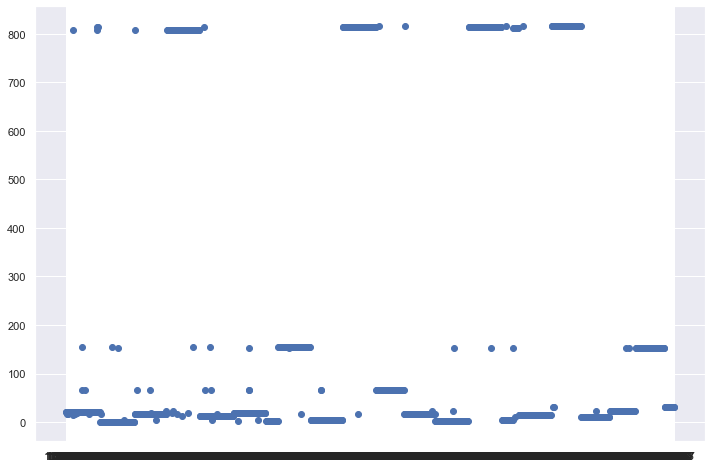

In [91]:
plt.figure(figsize=(12,8))
plt.scatter(x= ausie_df['time'], y=ausie_df['driverId']);

In [96]:
# ausie_df[ausie_df['time']>120]

In [94]:
#convers the milliseconds to 
import math
(ausie_df['milliseconds'].apply(lambda x: str(math.floor(x/60000))+':'+
                              str(math.floor(x%60000/1000)).zfill(2)+':'+str(x%1000).zfill(3)))

0       1:38:109
1       1:33:006
2       1:32:713
3       1:32:803
4       1:32:342
          ...   
1078    1:38:276
1079    1:36:991
1080    1:57:213
1081    1:42:267
1082    1:35:367
Name: milliseconds, Length: 1083, dtype: object

In [721]:
#ausie_df[ausie_df['driverId'] == 13]['time'].mean()

In [722]:
#ausie_df[ausie_df['driverId'] == 1]['time'].mean()

In [98]:
ausie_df.dtypes

raceId                    int64
driverId                  int64
lap                       int64
position                  int64
time            timedelta64[ns]
milliseconds              int64
time_secs               float64
secs_mins               float64
dtype: object

In [99]:
(laptimes.groupby('driverId')['time'].apply(lambda x: x.unique())[1])

array(['1:40.573', '1:33.774', '1:32.900', ..., '1:42.487', '1:42.185',
       '1:43.780'], dtype=object)

In [100]:
def driver_time(driver_id):
    return laptimes[laptimes['driverId'] == (driver_id)].sort_values('milliseconds')
driver_time(1)

,raceId,driverId,lap,position,time,milliseconds
414895,977,1,69,4,1:07.411,67411
414891,977,1,65,4,1:07.424,67424
414894,977,1,68,4,1:07.503,67503
414887,977,1,61,4,1:07.511,67511
414893,977,1,67,4,1:07.543,67543
...,...,...,...,...,...,...
404054,967,1,29,1,26:37.686,1597686
404046,967,1,21,1,35:26.744,2126744
378726,353,1,4,4,49:01.051,2941051
25037,861,1,9,1,52:17.033,3137033


In [101]:
def how_many_wins(driver_id):
    return results.loc[(results['positionOrder']== (driver_id)) & (results['driverId'] == (driver_id))]
how_many_wins(1)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
108,109,23,1,1,22.0,3,1.0,1,1,10.0,76,00:42.7,7242742.0,71.0,6.0,01:18.5,153.152,1
168,169,26,1,1,22.0,4,1.0,1,1,10.0,60,39:09.4,5949440.0,16.0,3.0,01:32.8,199.398,1
188,189,27,1,1,22.0,1,1.0,1,1,10.0,67,31:20.9,5480874.0,17.0,2.0,01:16.0,216.552,1
328,329,34,1,1,22.0,1,1.0,1,1,10.0,56,31:57.4,5517403.0,13.0,1.0,01:36.3,203.722,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23597,23602,980,1,131,44.0,1,1.0,1,1,25.0,44,24:42.8,5082820.0,35.0,2.0,01:46.6,236.526,1
23617,23622,981,1,131,44.0,1,1.0,1,1,25.0,53,15:32.3,4532312.0,50.0,2.0,01:23.5,249.793,1
23637,23642,982,1,131,44.0,5,1.0,1,1,25.0,58,03:23.5,7403544.0,55.0,1.0,01:45.0,173.643,1
23677,23682,984,1,131,44.0,1,1.0,1,1,25.0,53,27:31.2,5251194.0,43.0,6.0,01:33.8,222.917,1


In [102]:
results.loc[(results['positionOrder']==1) & (results['driverId'] == 1)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
108,109,23,1,1,22.0,3,1.0,1,1,10.0,76,00:42.7,7242742.0,71.0,6.0,01:18.5,153.152,1
168,169,26,1,1,22.0,4,1.0,1,1,10.0,60,39:09.4,5949440.0,16.0,3.0,01:32.8,199.398,1
188,189,27,1,1,22.0,1,1.0,1,1,10.0,67,31:20.9,5480874.0,17.0,2.0,01:16.0,216.552,1
328,329,34,1,1,22.0,1,1.0,1,1,10.0,56,31:57.4,5517403.0,13.0,1.0,01:36.3,203.722,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23597,23602,980,1,131,44.0,1,1.0,1,1,25.0,44,24:42.8,5082820.0,35.0,2.0,01:46.6,236.526,1
23617,23622,981,1,131,44.0,1,1.0,1,1,25.0,53,15:32.3,4532312.0,50.0,2.0,01:23.5,249.793,1
23637,23642,982,1,131,44.0,5,1.0,1,1,25.0,58,03:23.5,7403544.0,55.0,1.0,01:45.0,173.643,1
23677,23682,984,1,131,44.0,1,1.0,1,1,25.0,53,27:31.2,5251194.0,43.0,6.0,01:33.8,222.917,1


In [107]:
k = pd.DataFrame()
k['X'] = np.arange(5) + 1
k['Y'] = [7,5,1,6,9]
print (k.corr(method = 'kendall'))

     X    Y
X  1.0  0.2
Y  0.2  1.0


,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,...,fastestLap,rank,statusId,lap,year,round,circuitId,lat,lng,alt
0,1,18,1,1,22.0,1,1.0,1,10.0,58,...,39.0,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3.0,5,2.0,2,8.0,58,...,41.0,3.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7.0,7,3.0,3,6.0,58,...,41.0,5.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5.0,11,4.0,4,5.0,58,...,58.0,7.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23.0,3,5.0,5,4.0,58,...,43.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,0.0,54,...,33.0,16.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23773,23778,988,828,15,9.0,19,17.0,17,0.0,54,...,36.0,15.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23774,23779,988,840,3,18.0,15,18.0,18,0.0,54,...,52.0,6.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23775,23780,988,832,4,55.0,12,NaN,19,0.0,31,...,26.0,14.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
dff.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,surname,dob,nationality,circuitRef,location,country,lat,lng,alt,status
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished
1,2,18,2,2,3.0,5,2.0,2,2,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished
2,3,18,3,3,7.0,7,3.0,3,3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished
3,4,18,4,4,5.0,11,4.0,4,4,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished
4,5,18,5,1,23.0,3,5.0,5,5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finished


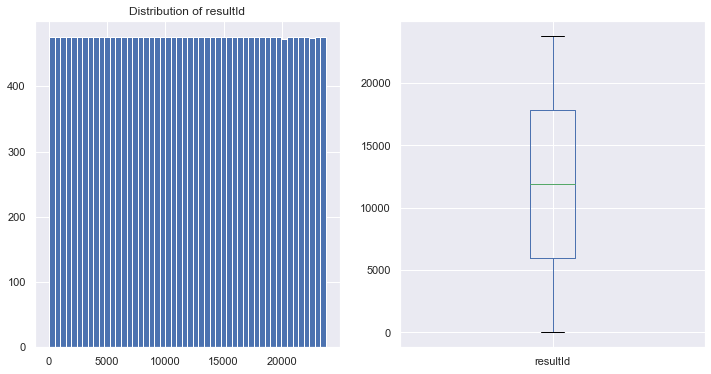

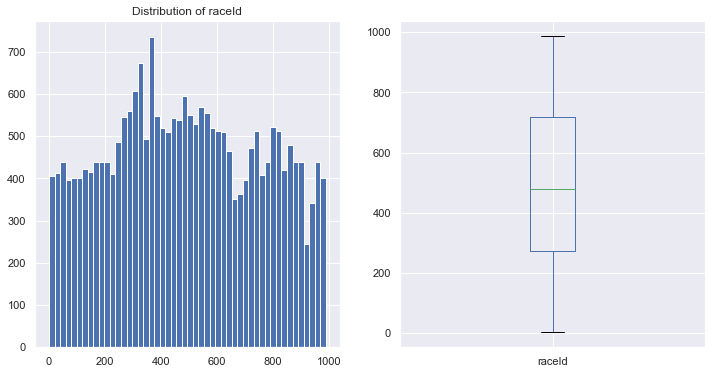

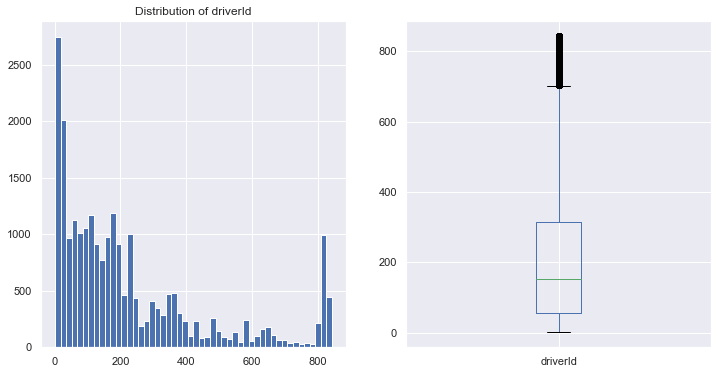

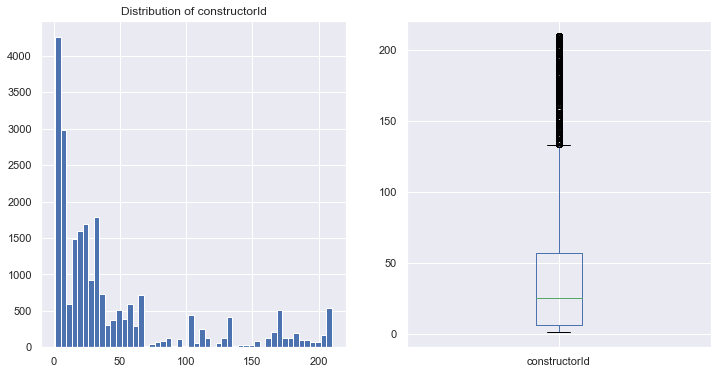

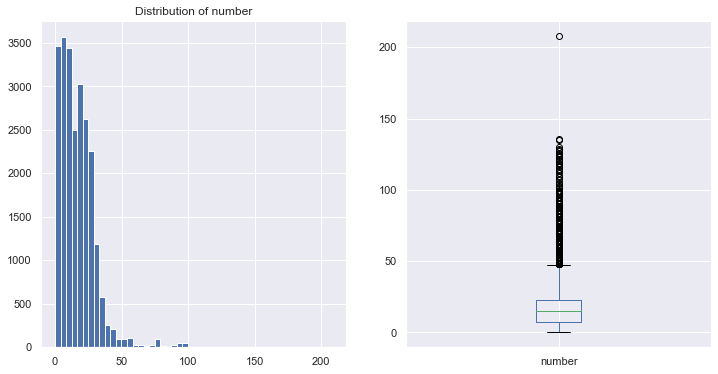

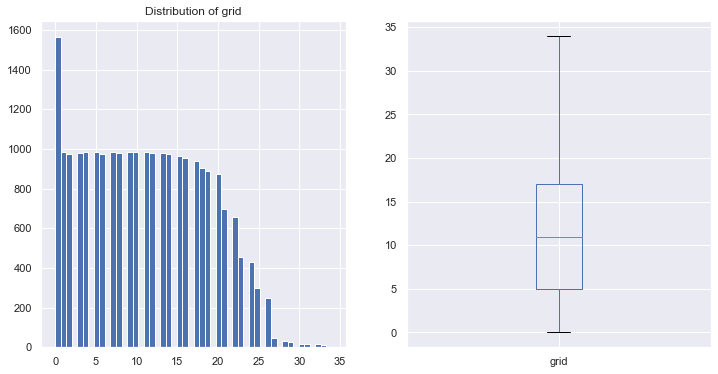

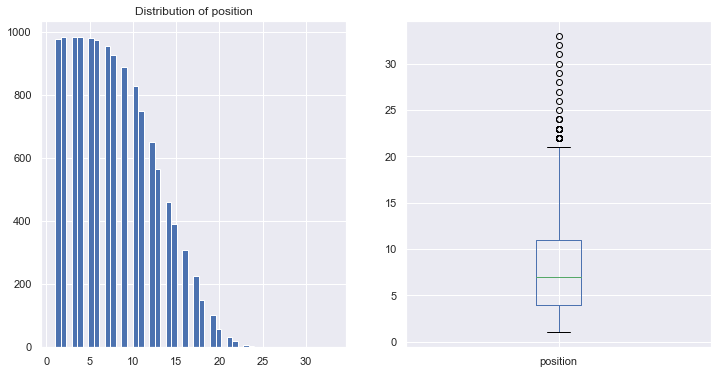

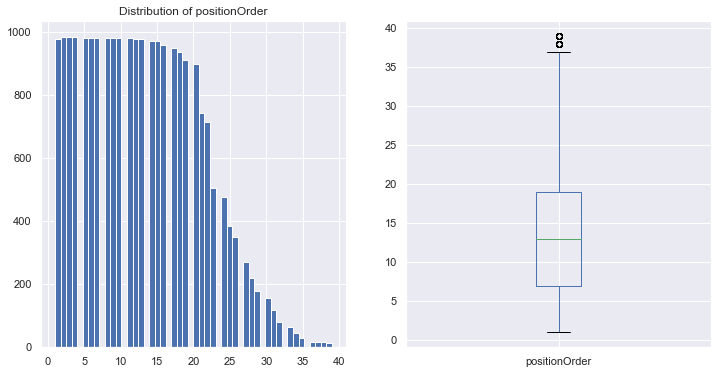

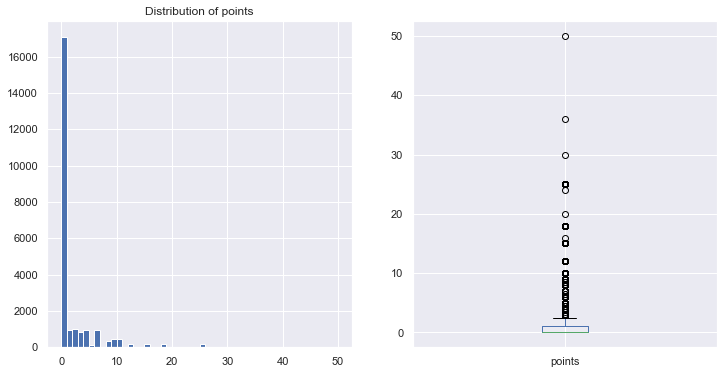

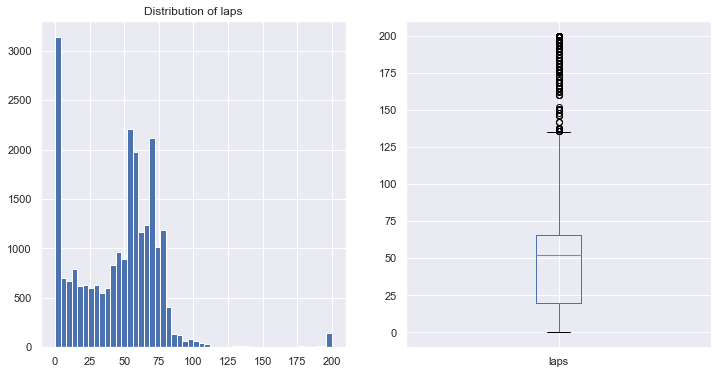

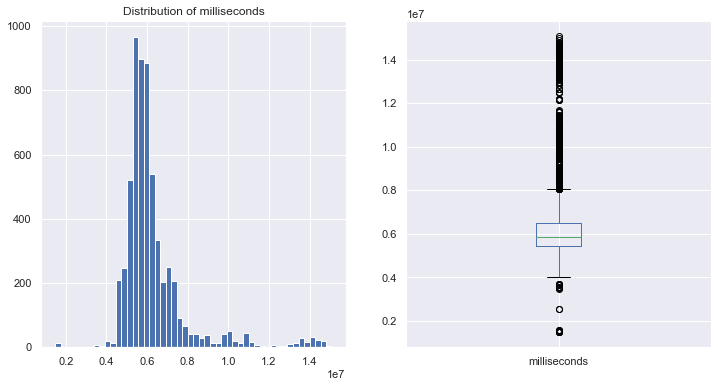

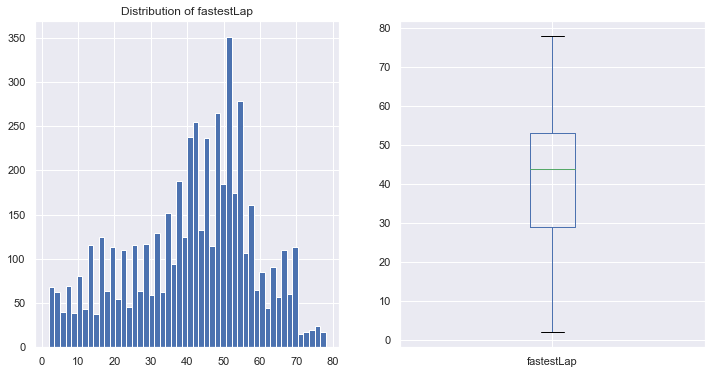

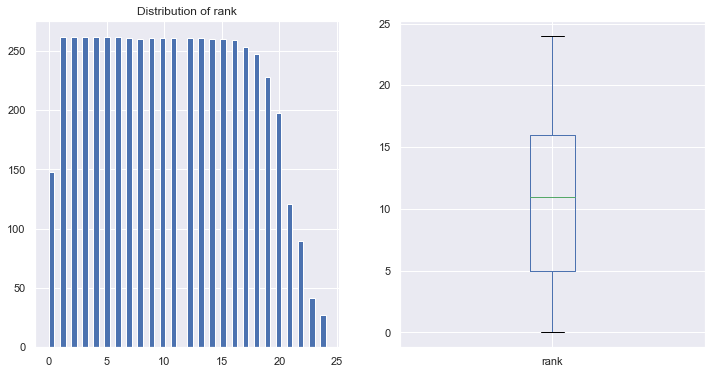

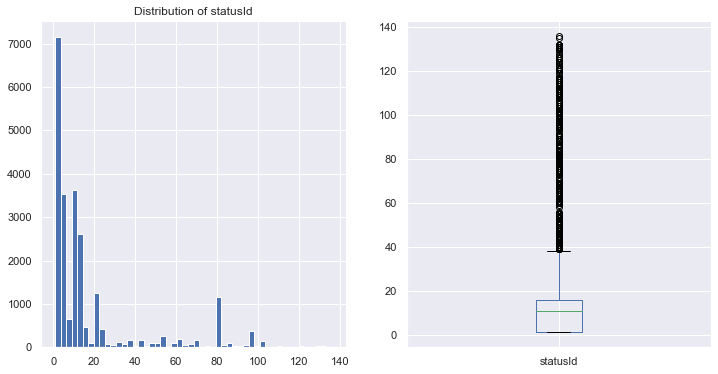

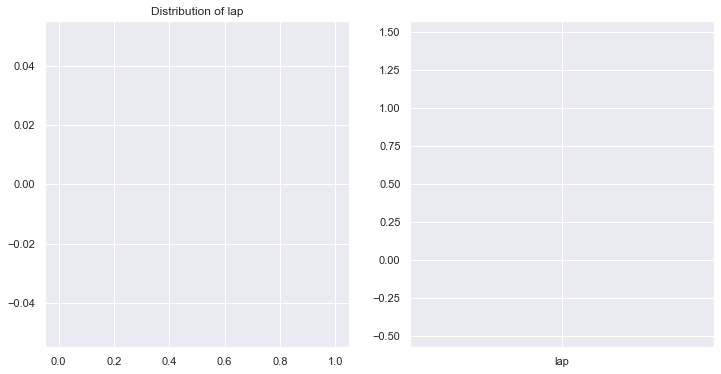

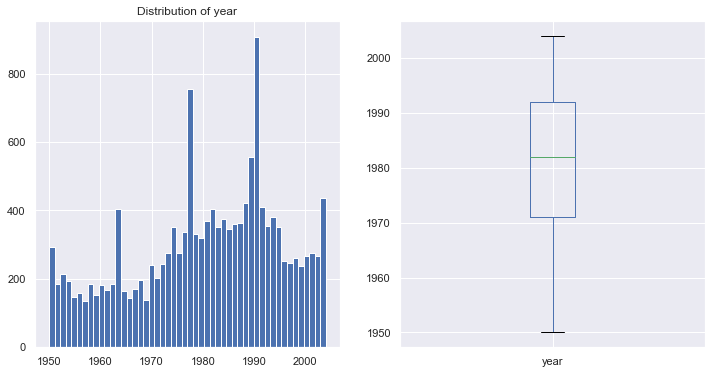

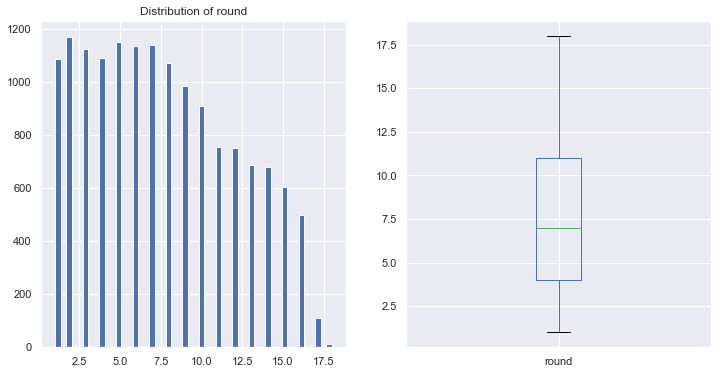

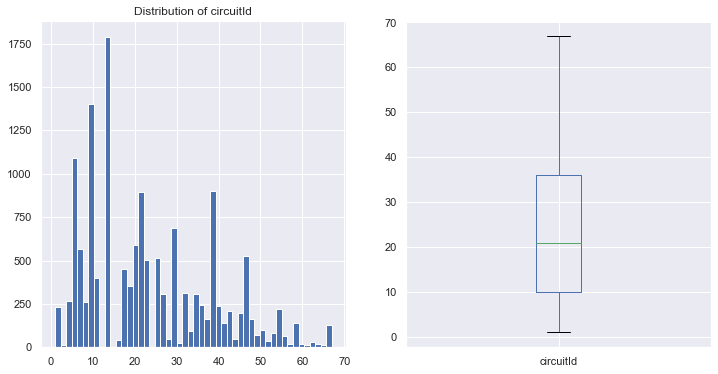

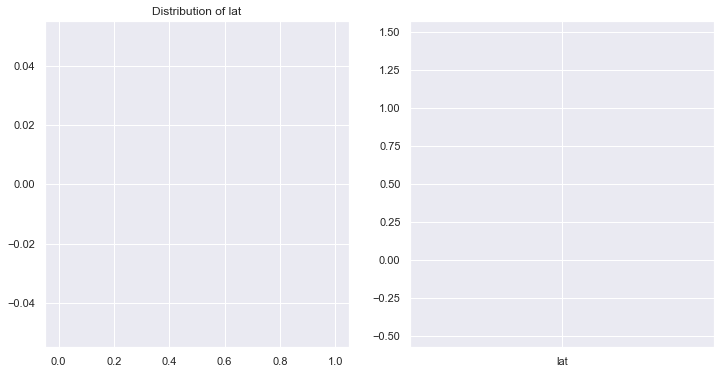

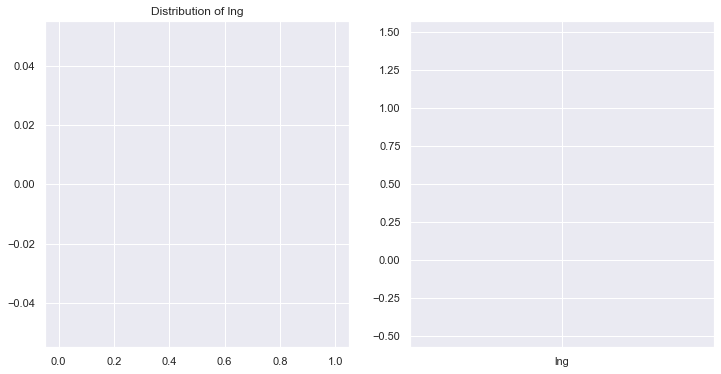

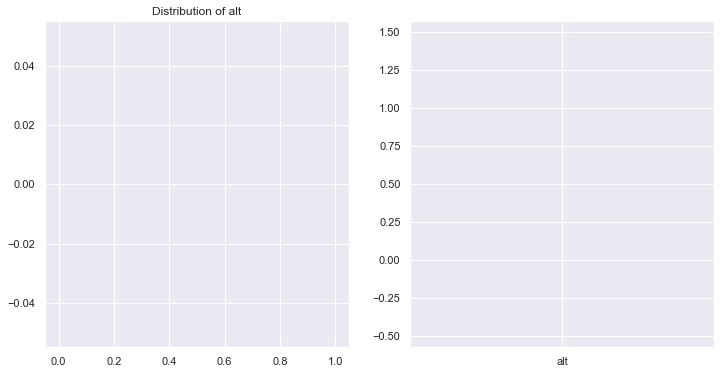

In [138]:
for col in dff.select_dtypes(include=np.number):
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    dff[col].hist(bins = 50, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    dff.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

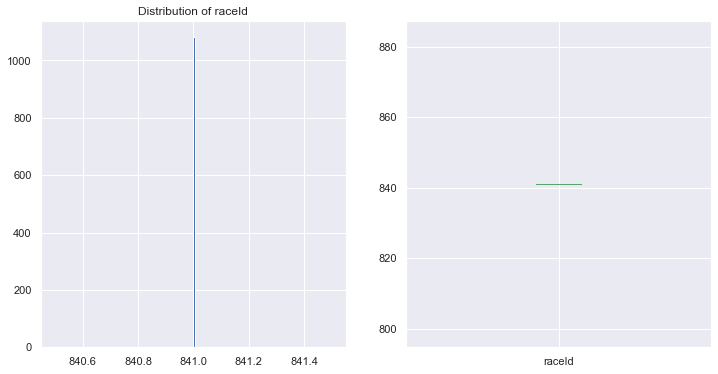

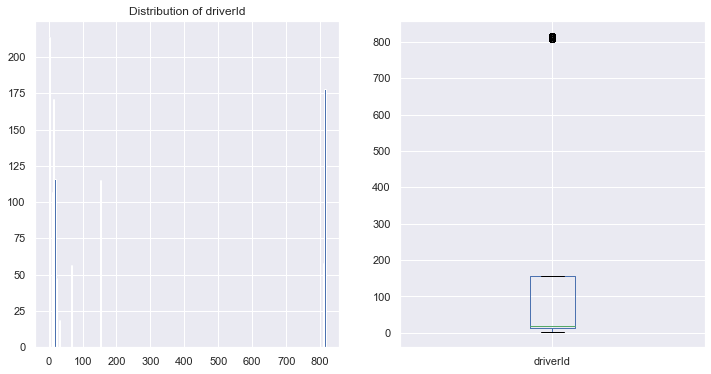

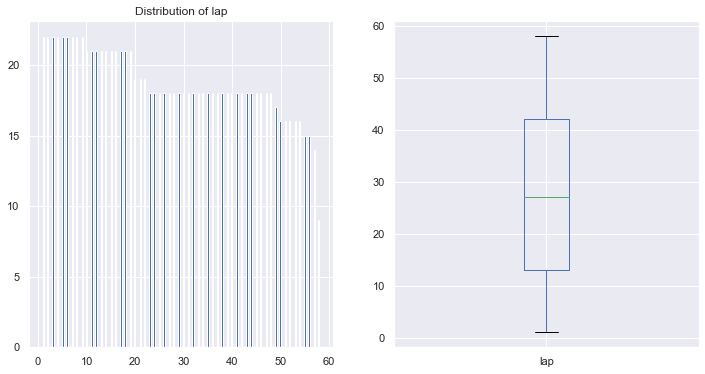

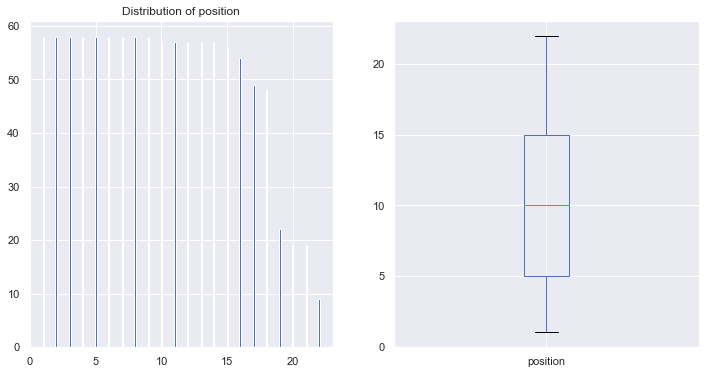

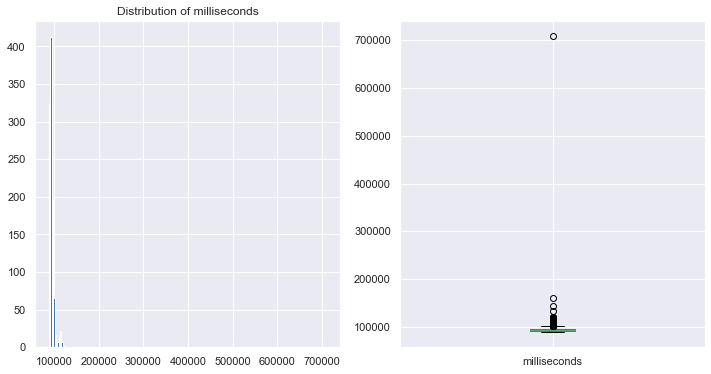

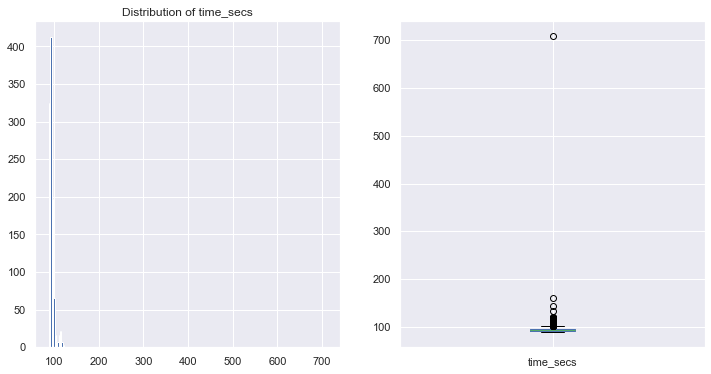

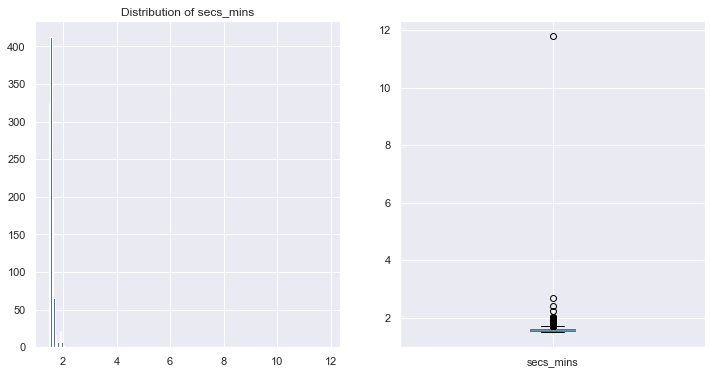

In [151]:
for col in ausie_df.select_dtypes(include=[float,int]):
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    ausie_df[col].hist(bins = 20, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    ausie_df.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

In [155]:
ausie_df.head()

,raceId,driverId,lap,position,time,milliseconds,time_secs,secs_mins
0,841,20,1,1,00:01:38.109000,98109,98.109,1.635150
1,841,20,2,1,00:01:33.006000,93006,93.006,1.550100
2,841,20,3,1,00:01:32.713000,92713,92.713,1.545217
3,841,20,4,1,00:01:32.803000,92803,92.803,1.546717
4,841,20,5,1,00:01:32.342000,92342,92.342,1.539033


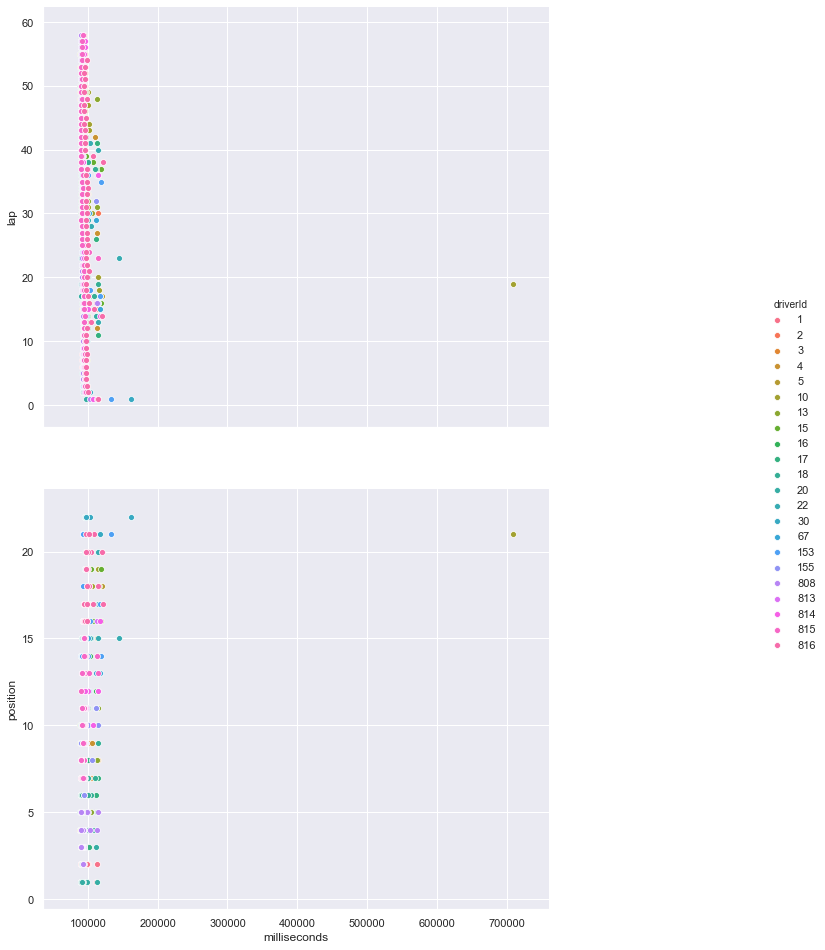

In [183]:
#excellent way of seeing how variables connect to one another.  
g =sns.pairplot(ausie_df, hue='driverId', x_vars='milliseconds', y_vars= ['lap','position'])
g.fig.set_size_inches(15,15)

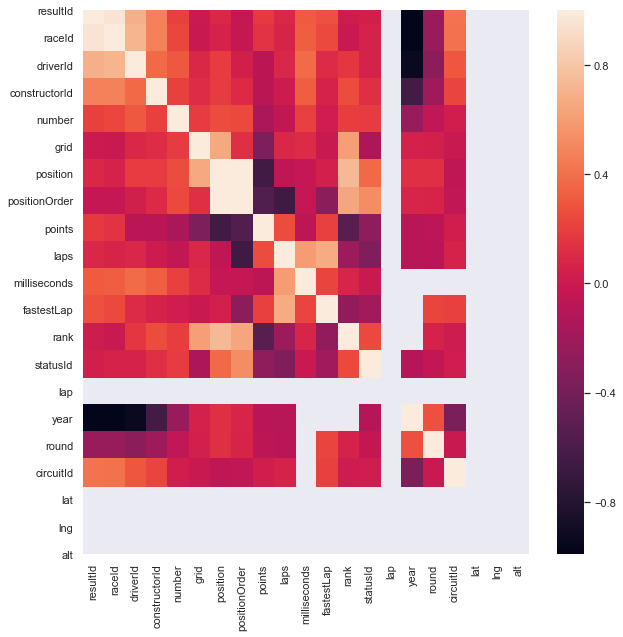

In [180]:
plt.figure(figsize=(10,10))
sns.heatmap(dff.corr(method='pearson'))

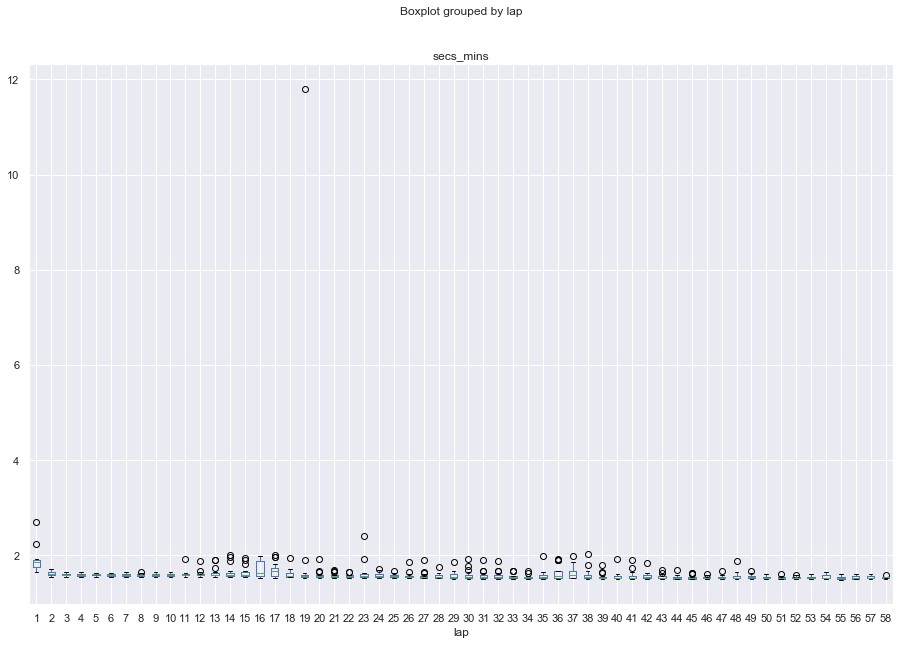

In [199]:
# we then plot it here
f, axes = plt.subplots(1, 1, figsize=(15, 10))   
ausie_df.boxplot(column='secs_mins', by = 'lap', ax = axes)
plt.show()


In [239]:
ausie_df.columns

Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds',
       'time_secs', 'secs_mins'],
      dtype='object')

In [270]:
ausie_y = ausie_df[['secs_mins']]

In [271]:
numeric_columns =['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']
def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = ausie_df[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = ausie_df[(ausie_df[col] > mean + 3*sd) | (ausie_df[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

# we call the function we just created on the boston dataset
ausie_outliers = get_outliers(ausie_df, numeric_columns)
ausie_y = pd.DataFrame(ausie_y).drop(ausie_outliers, axis = 0).values.ravel()

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [273]:
def scale_numeric(data, numeric_columns, scaler):
    for col in numeric_columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

# we can now define the scaler we want to use and apply it to our dataset 

# a good exercise would be to research waht StandardScaler does - it is from the scikit learn library 
scaler = StandardScaler()
ausie_X = scale_numeric(ausie_X, numeric_columns, scaler)

# here we can see the result 
ausie_X[0:10]


,raceId,driverId,lap,position,time,milliseconds,time_secs,secs_mins
0,0.0,-0.57096,-1.603438,-1.598722,0.548616,0.548616,0.548616,0.548616
1,0.0,-0.57096,-1.543092,-1.598722,-0.349333,-0.349333,-0.349333,-0.349333
2,0.0,-0.57096,-1.482746,-1.598722,-0.400891,-0.400891,-0.400891,-0.400891
3,0.0,-0.57096,-1.422400,-1.598722,-0.385054,-0.385054,-0.385054,-0.385054
4,0.0,-0.57096,-1.362054,-1.598722,-0.466174,-0.466174,-0.466174,-0.466174
5,0.0,-0.57096,-1.301708,-1.598722,-0.419895,-0.419895,-0.419895,-0.419895
6,0.0,-0.57096,-1.241362,-1.598722,-0.438020,-0.438020,-0.438020,-0.438020
7,0.0,-0.57096,-1.181016,-1.598722,-0.431861,-0.431861,-0.431861,-0.431861
8,0.0,-0.57096,-1.120671,-1.598722,-0.308157,-0.308157,-0.308157,-0.308157
9,0.0,-0.57096,-1.060325,-1.598722,-0.425702,-0.425702,-0.425702,-0.425702


In [274]:
# a common way for splitting our dataset is using train_test_split 

# as an exercise, go to the scikit learn documentation to learn more about this function and the parameters available 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(ausie_X, ausie_y, test_size = 0.3, random_state = 42)

# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  756
Number of features:  8


Test Set:
Number of datapoints:  325
Number of features:  8


In [275]:
### Train and Test the Model"""

lm = LinearRegression()

# fitting the model to the data means to train our model on the data
# the fit function takes both the X and y variables of the training data 
lm.fit(X_train, Y_train)

# from this, we can generate a set of predictions on our unseen features, X_test
Y_pred = lm.predict(X_test)

Mean squared error:  5.097255079889615e-32
Mean absolute error:  2.240942474320316e-16
R^2 :  1.0


2.240942474320316e-16

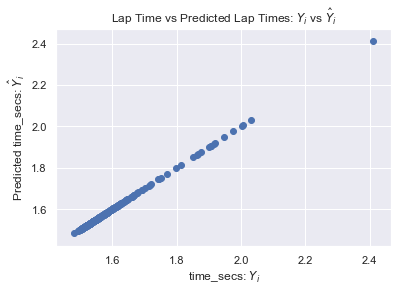

In [276]:
def evaluate(Y_test, Y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("time_secs: $Y_i$")
    plt.ylabel("Predicted time_secs: $\hat{Y}_i$")
    plt.title("Lap Time vs Predicted Lap Times: $Y_i$ vs $\hat{Y}_i$")

evaluate(Y_test, Y_pred)

# we can explore how metrics are dervied in a little more detail by looking at MAE
# here we will implement MAE using numpy, building it up step by step

# with MAE, we get the absolute values of the error - as you can see this is of the difference between the actual and predicted values
np.abs(Y_test - Y_pred)

# we will then sum them up 
np.sum(np.abs(Y_test - Y_pred))

# then divide by the total number of predictions/actual values
# as you will see, we get to the same score implemented above 
np.sum(np.abs(Y_test - Y_pred))/len(Y_test)

In [278]:
# we can run our train_test_split function and see that we have an additional features
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(ausie_X, ausie_y, test_size = 0.2, random_state = 42)

print('Number of features after dataset refinement: ', X_train.shape[1])


Number of features after dataset refinement:  8


Mean squared error:  4.930380657631324e-32
Mean absolute error:  2.1999811087042273e-16
R^2 :  1.0


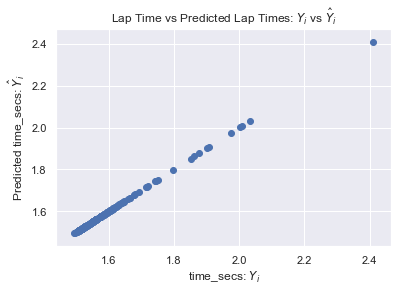

In [279]:
# we can now run the same code as before on our refined dataset to see if things have improved 

lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

evaluate(Y_test, Y_pred)

Mean squared error:  0.00045609731089470184
Mean absolute error:  0.002251598960761696
R^2 :  0.9602521899711319


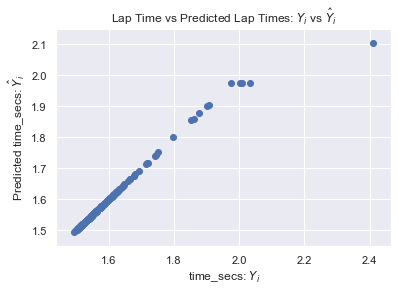

In [280]:
"""### Test Alternative Models
* Once we got a nice baseline model working for this dataset, we also can try something more sophisticated and rather different, e.g. RandomForest Regressor. So, let's do so and also evaluate the result.
"""

# as you can see, its very similar code to instantiate the model
# we are able to pass in additional parameters as the model is created, so optionally you can view the documentation and play with these values

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

evaluate(Y_test, Y_pred)

Mean squared error:  0.000375521139959798
Mean absolute error:  0.0020928906510494665
R^2 :  0.9672742141284144


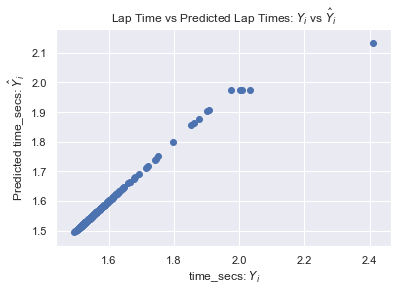

In [281]:
"""### : Choose the best model and optimise its parameters
* We can see that we have improved our model as we have added features and trained new models.
* At the point that we feel comfortable with a good model, we can start to tune the parameters of the model.
* There are a number of ways to do this, and a common way is shown below
"""

## grid search is a 'brute force' search, one that will explore every possible combination of parameters that you provide it

# we first define the parameters we want to search as a dictionary. Explore the documentation to what other options are avaiable
params = {'n_estimators': [100, 200], 'max_depth' : [2, 10, 20]}

# we then create a grid search object with our chosen model and paramters. We also use cross validation here - explored more in Day 2
grid = model_selection.GridSearchCV(rfr, params, cv=5)

# we fit our model to the data as before
grid.fit(X_train, Y_train)

# one output of the grid search function is that we can get the best_estimator - the model and parameters that scored best on the training data - 
#  and save it as a new a model
best_model = grid.best_estimator_

# and use it to predict and evaluate as before
Y_pred = best_model.predict(X_test)

evaluate(Y_test, Y_pred)
